In [17]:
import numpy as np
import pints
import pints.plot
import pints_smol_moments_jit as toy
import matplotlib.pyplot as plt
from scipy.stats import moment
import pandas as pd



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [39]:

model = toy.SmolModel(None,None)


true_parameters = [0.0003, 900]


times = np.linspace(20, 97, 78)

df = pd.read_csv('s09_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())


# 1st moment is mean, 1st centred moment should be array 6
centred_moment_1 = moment(org_values, moment=1, axis=1)
centred_moment_2 = moment(org_values, moment=2, axis=1)
centred_moment_3 = moment(org_values, moment=3, axis=1)
centred_moment_4 = moment(org_values, moment=4, axis=1)
centred_moment_5 = moment(org_values, moment=5, axis=1)

centred_moments = np.zeros((78,5))
centred_moments[:,0] = centred_moment_1
centred_moments[:,1] = centred_moment_2
centred_moments[:,2] = centred_moment_3
centred_moments[:,3] = centred_moment_4
centred_moments[:,4] = centred_moment_5

# print(centred_moments.shape)


Add noise to the data (using random sampling from normal distribution)

In [19]:

# noise = 9
# values = org_values + np.random.normal(0, noise, org_values.shape)

size_noise = 5
noise_value = 25
# # Create a list with the specified size filled with a placeholder value
noise_arr = [noise_value for _ in range(size_noise)]
noise_arr[0] = 1
noise_arr[1] = 10
noise_arr[2] = 100
noise_arr[3] = 5000
noise_arr[4] = 500000


Set-up pints problem and log likelihoods

In [20]:

problem = pints.MultiOutputProblem(model, times, centred_moments)

log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# print(true_parameters)



Original problem dimension: 2
New dimension: 7


Create uniform log prior

In [21]:

# Define the size of the list
size = 7
placeholder_lower_value = 0
placeholder_upper_value = 1000
 
# Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.00001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 1
prior_arr_upper[1] = 10000
prior_arr_lower[2] = 0
prior_arr_upper[2] = 10
prior_arr_lower[3] = 0
prior_arr_upper[3] = 2000
prior_arr_lower[4] = 0
prior_arr_upper[4] = 200000
prior_arr_lower[5] = 0
prior_arr_upper[5] = 20000000
prior_arr_lower[6] = 0
prior_arr_upper[6] = 1000000000


# log_prior = pints.UniformLogPrior(
#     [0.000001, 1, 1],
#     [0.01, 10000, 100]
#     )
log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_84979/3441739735.py:29: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [33]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 5000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0
1     510     0:01.1
2     1026    0:02.4
3     1485    0:03.8
20    9381    0:24.2
40    18891   0:47.0
60    29694   1:08.9
80    43056   1:30.1
100   57684   1:51.8
120   74142   2:14.6
140   92931   2:40.0
160   114759   3:07.8
180   139425   3:38.4
200   166590   4:12.0
220   196269   4:46.9
240   228849   5:24.8
260   263721   6:04.2
280   300693   6:45.7
300   341067   7:30.7
320   383256   8:17.8
340   428781   9:07.7
360   477009  10:00.6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_log_likelihoods.py:832: RuntimeWarning: invalid value encountered in divide
  - np.sum(error**2, axis=0) / (2 * sigma**2))


380   527958  10:55.2
400   580734  11:50.4
420   633093  12:46.3
440   686076  13:42.6
460   739068  14:39.0
480   791727  15:35.7
500   844374  16:31.0
520   897579  17:27.1
540   949572  18:23.6
560   1002165  19:19.6
580   1054665  20:15.3
600   1107018  21:09.8
620   1159122  22:04.4
640   1211919  22:59.6
660   1264545  23:55.0
680   1317087  24:49.6
700   1369770  25:44.8
720   1422087  26:39.7
740   1473846  27:34.8
760   1526109  28:30.0
780   1578033  29:29.2
800   1631118  30:32.1
820   1683405  31:33.7
840   1735365  32:34.5
860   1787298  33:36.9
880   1840332  34:39.5
900   1892769  35:41.6
920   1945533  36:44.2
940   1997325  37:45.3
960   2050005  38:47.2
980   2102553  39:49.8
1000  2155014  40:51.3
1020  2207556  41:53.3
1040  2260371  42:56.1
1060  2312343  43:58.4
1080  2365164  45:00.6
1100  2417319  46:02.9
1120  2469732  47:04.6
1140  2521473  48:06.0
1160  2573841  49:07.7
1180  2626074  50:08.9
1200  2678655  51:10.4
1220  2730819  52:12.4
1240  2783118  53:14

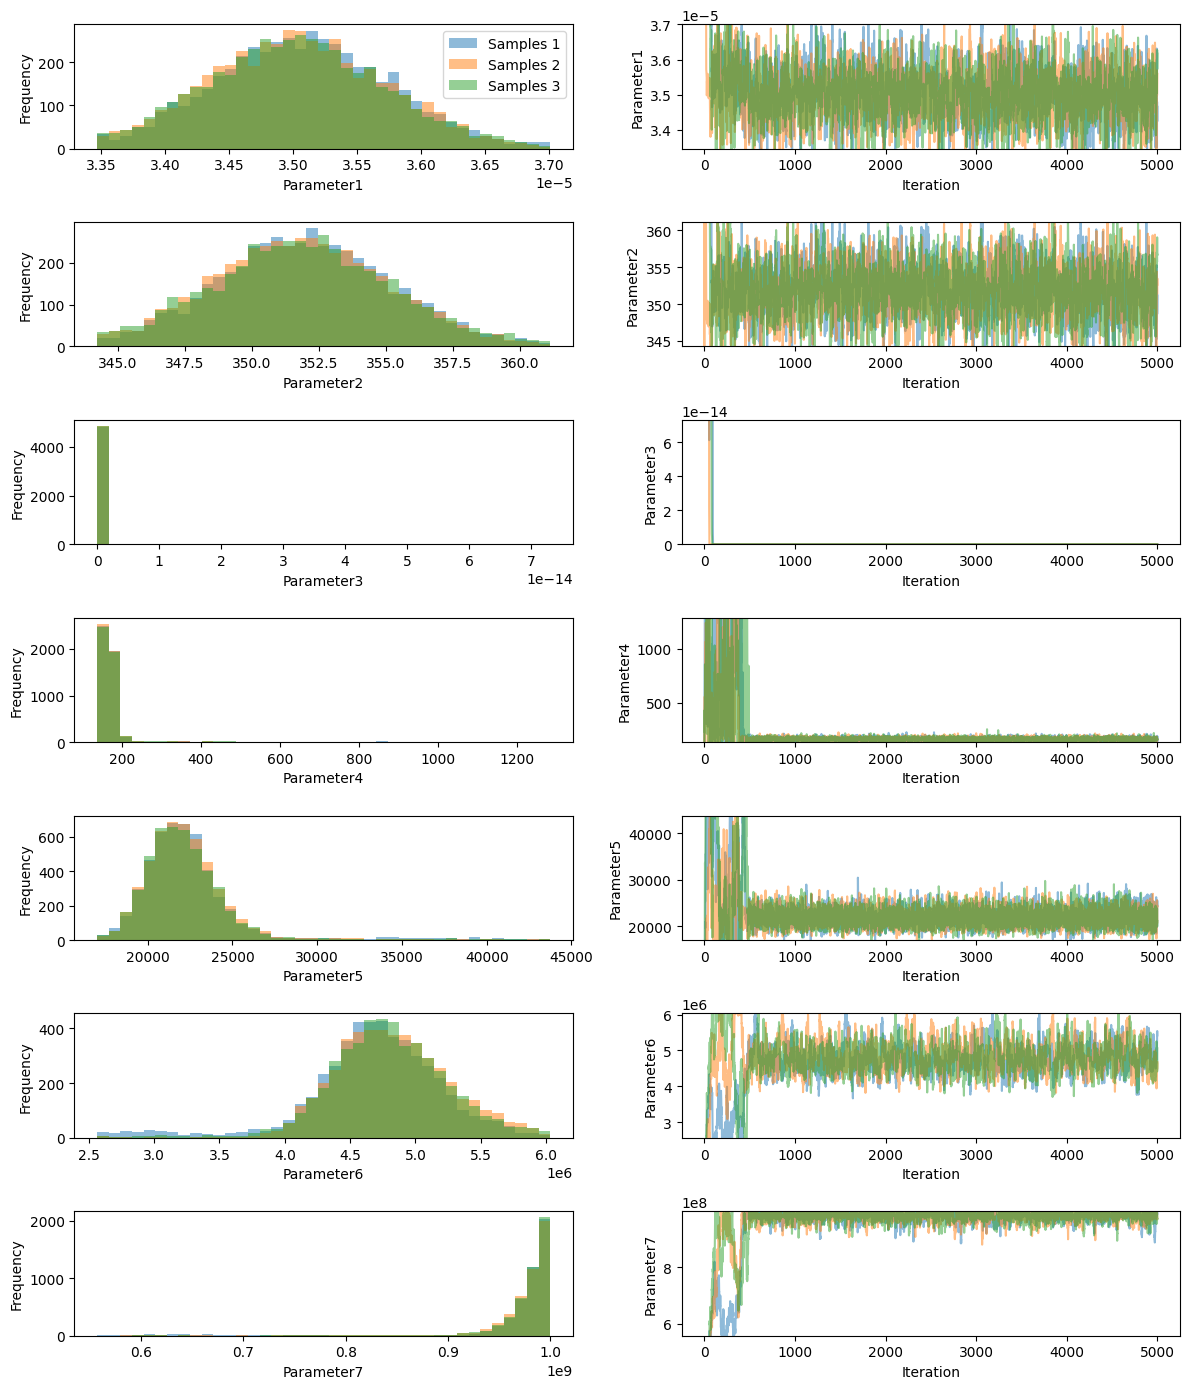

In [41]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()


In [24]:

# ITERS = 100
AllChains = chains[0,:-int(2*ITERS/4),:]
# np.asarray(AllChains)
print(np.shape(AllChains))
print(AllChains[0])
print(AllChains)


(30, 7)
[2.7e-04 8.1e+02 9.0e-01 9.0e+00 9.0e+01 4.5e+03 4.5e+05]
[[2.70000000e-04 8.10000000e+02 9.00000000e-01 9.00000000e+00
  9.00000000e+01 4.50000000e+03 4.50000000e+05]
 [9.20828035e-05 3.05877176e+02 3.27629747e+00 9.44678770e+00
  4.19706420e+03 1.05964424e+04 8.43539048e+06]
 [1.93727945e-05 2.49241943e+02 3.37356454e+00 4.51047564e+02
  4.60494207e+03 3.42404668e+04 2.10177057e+07]
 [1.42488773e-05 2.53455806e+02 8.78054162e+00 2.55470491e+02
  2.26624158e+03 1.81188999e+05 1.43897399e+07]
 [1.48759463e-05 2.68359242e+02 6.73315825e+00 6.55603216e+02
  1.75504459e+03 3.71107961e+05 1.76887227e+07]
 [2.05982633e-05 2.81221850e+02 8.35953453e+00 3.92634385e+01
  1.43313849e+03 2.54507724e+05 2.77061610e+07]
 [2.13324336e-05 2.81165371e+02 9.81816423e+00 2.53602108e+02
  7.91023821e+03 6.20576541e+05 4.83041819e+07]
 [2.16911798e-05 2.83244280e+02 1.08363104e+00 1.28798418e+02
  1.49905170e+04 8.22232055e+05 4.69893447e+07]
 [2.22968930e-05 2.94532963e+02 6.66942167e+00 4.08526

In [25]:

for I in range(3-1):
    AllChains_add = chains[I+1,:-int(2*ITERS/4),:]
    AllChains = np.concatenate((AllChains,AllChains_add), axis=0)


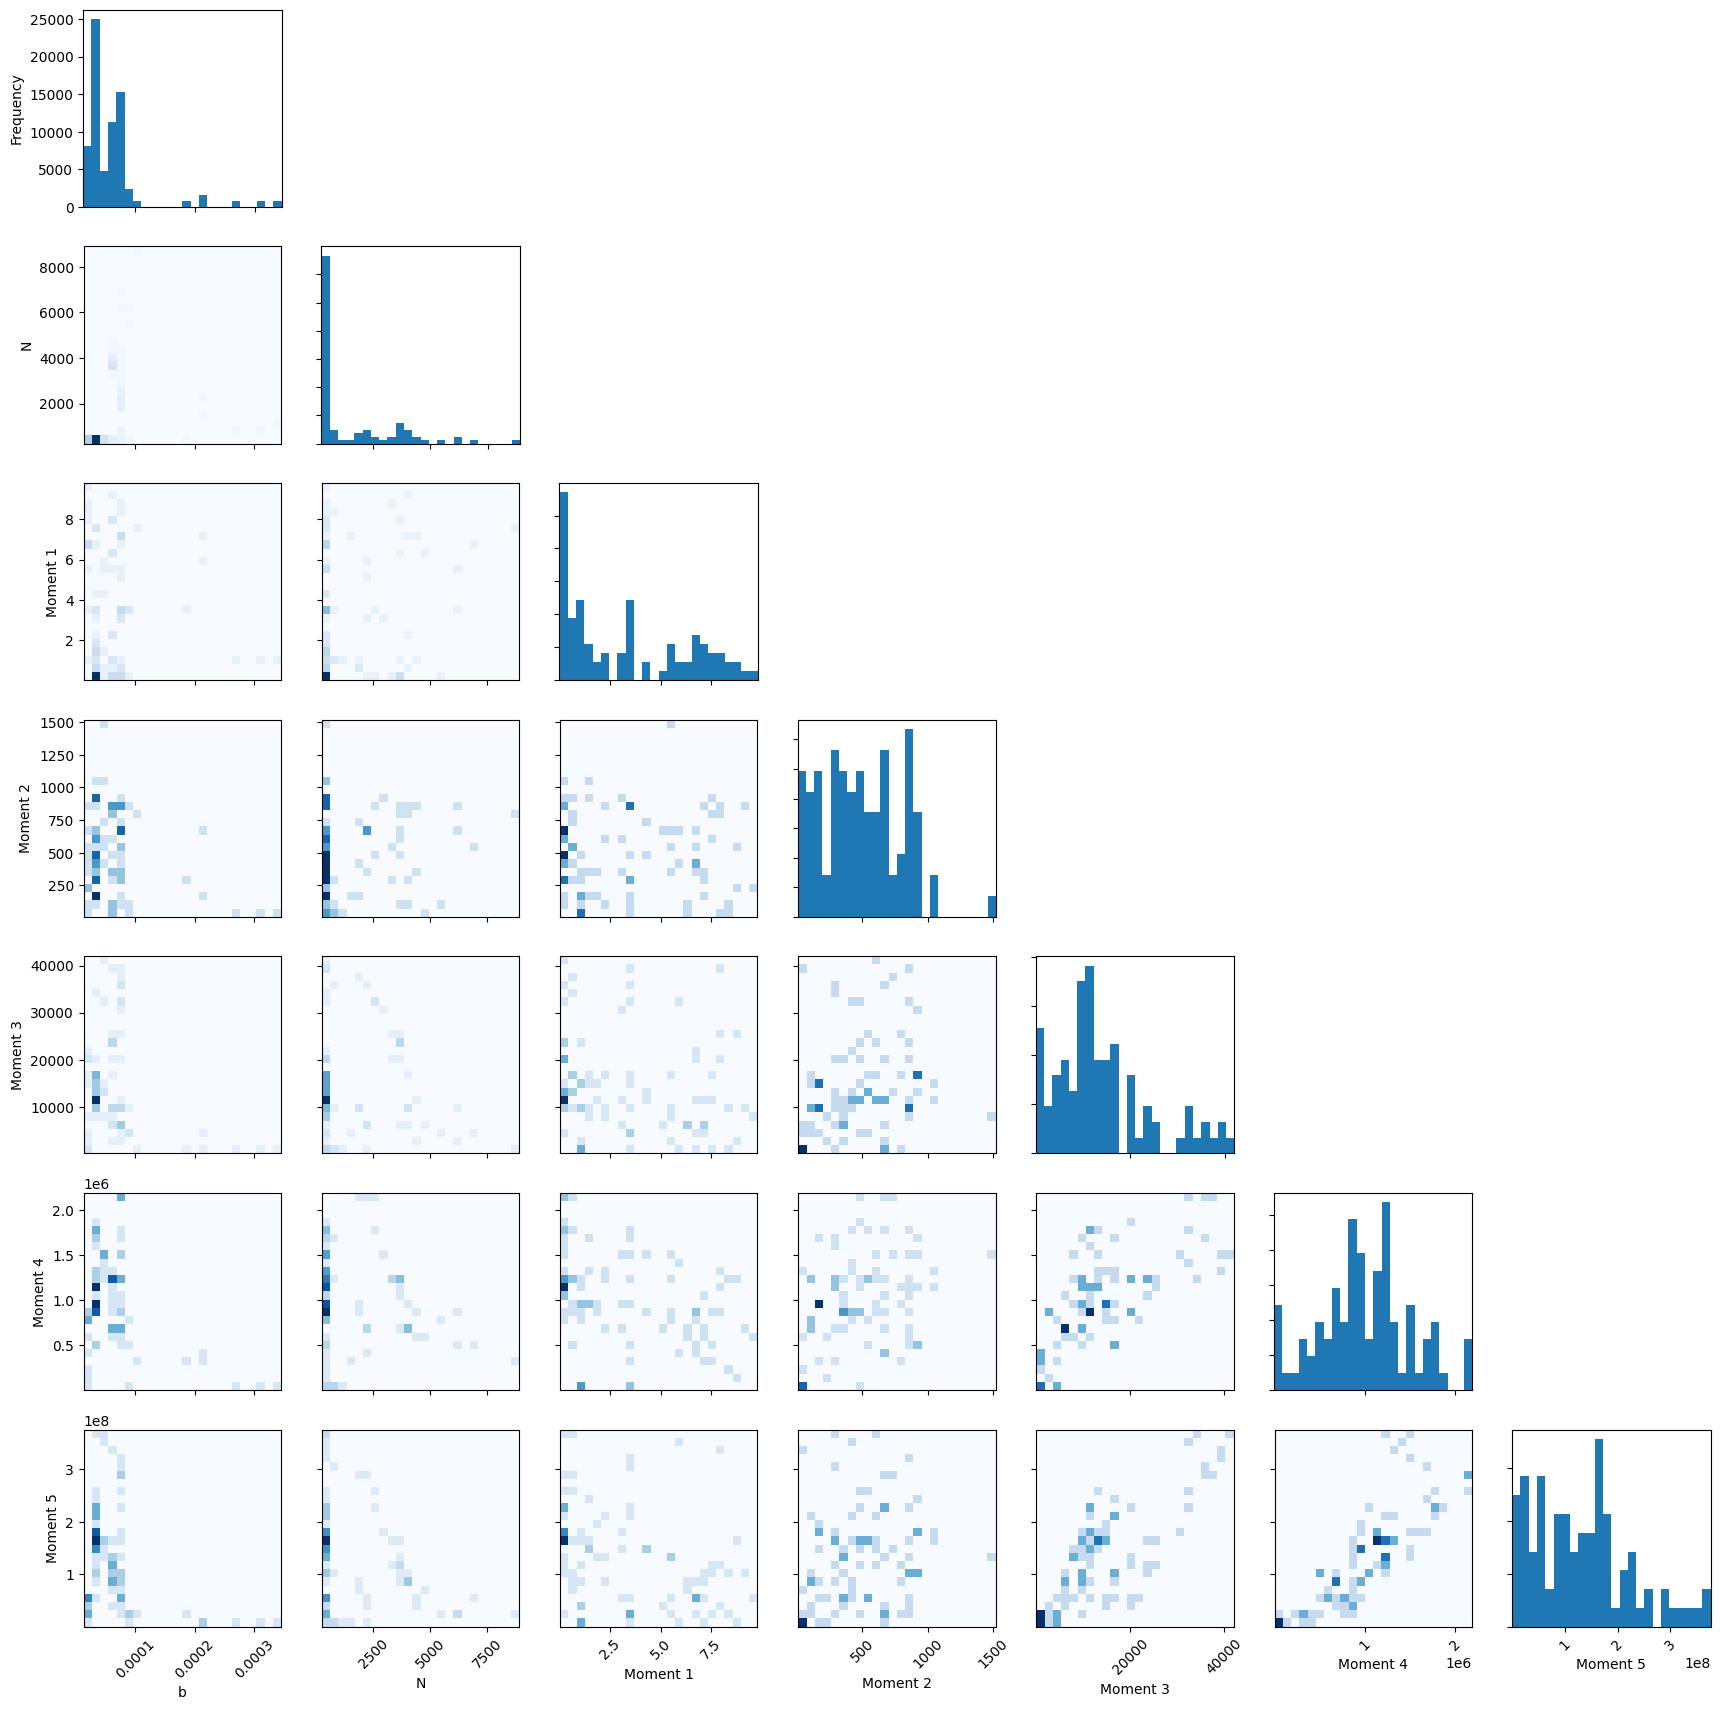

In [26]:


parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"])
plt.show()

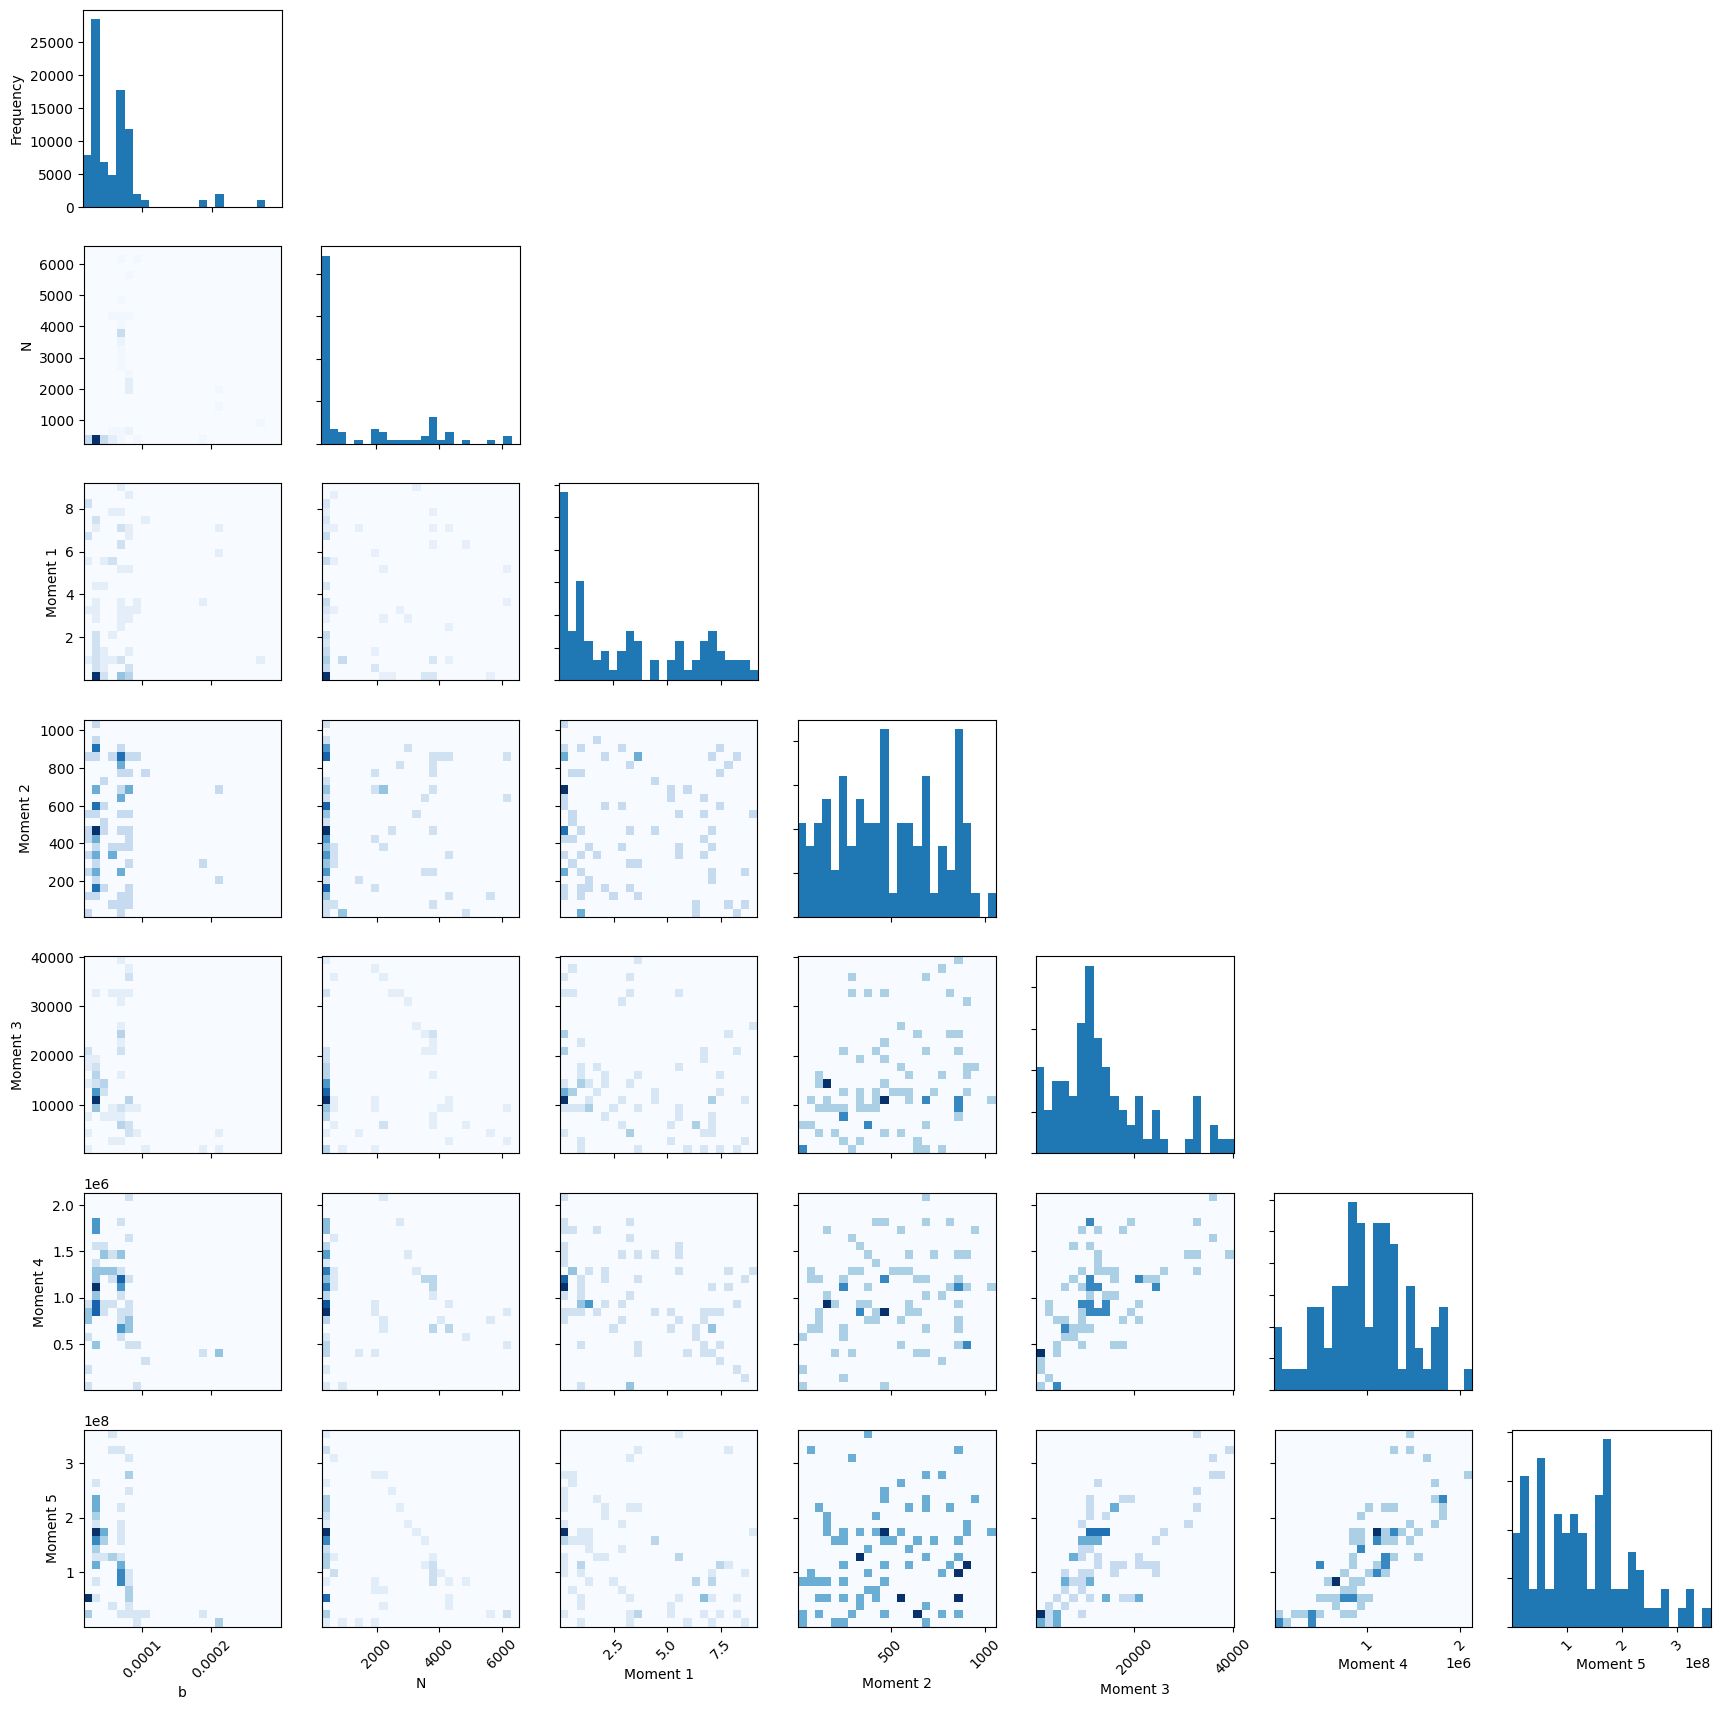

In [27]:
parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"],
                    n_percentiles=97)
plt.show()

[2.7e-04 8.1e+02 9.0e-01 9.0e+00 9.0e+01 4.5e+03 4.5e+05]


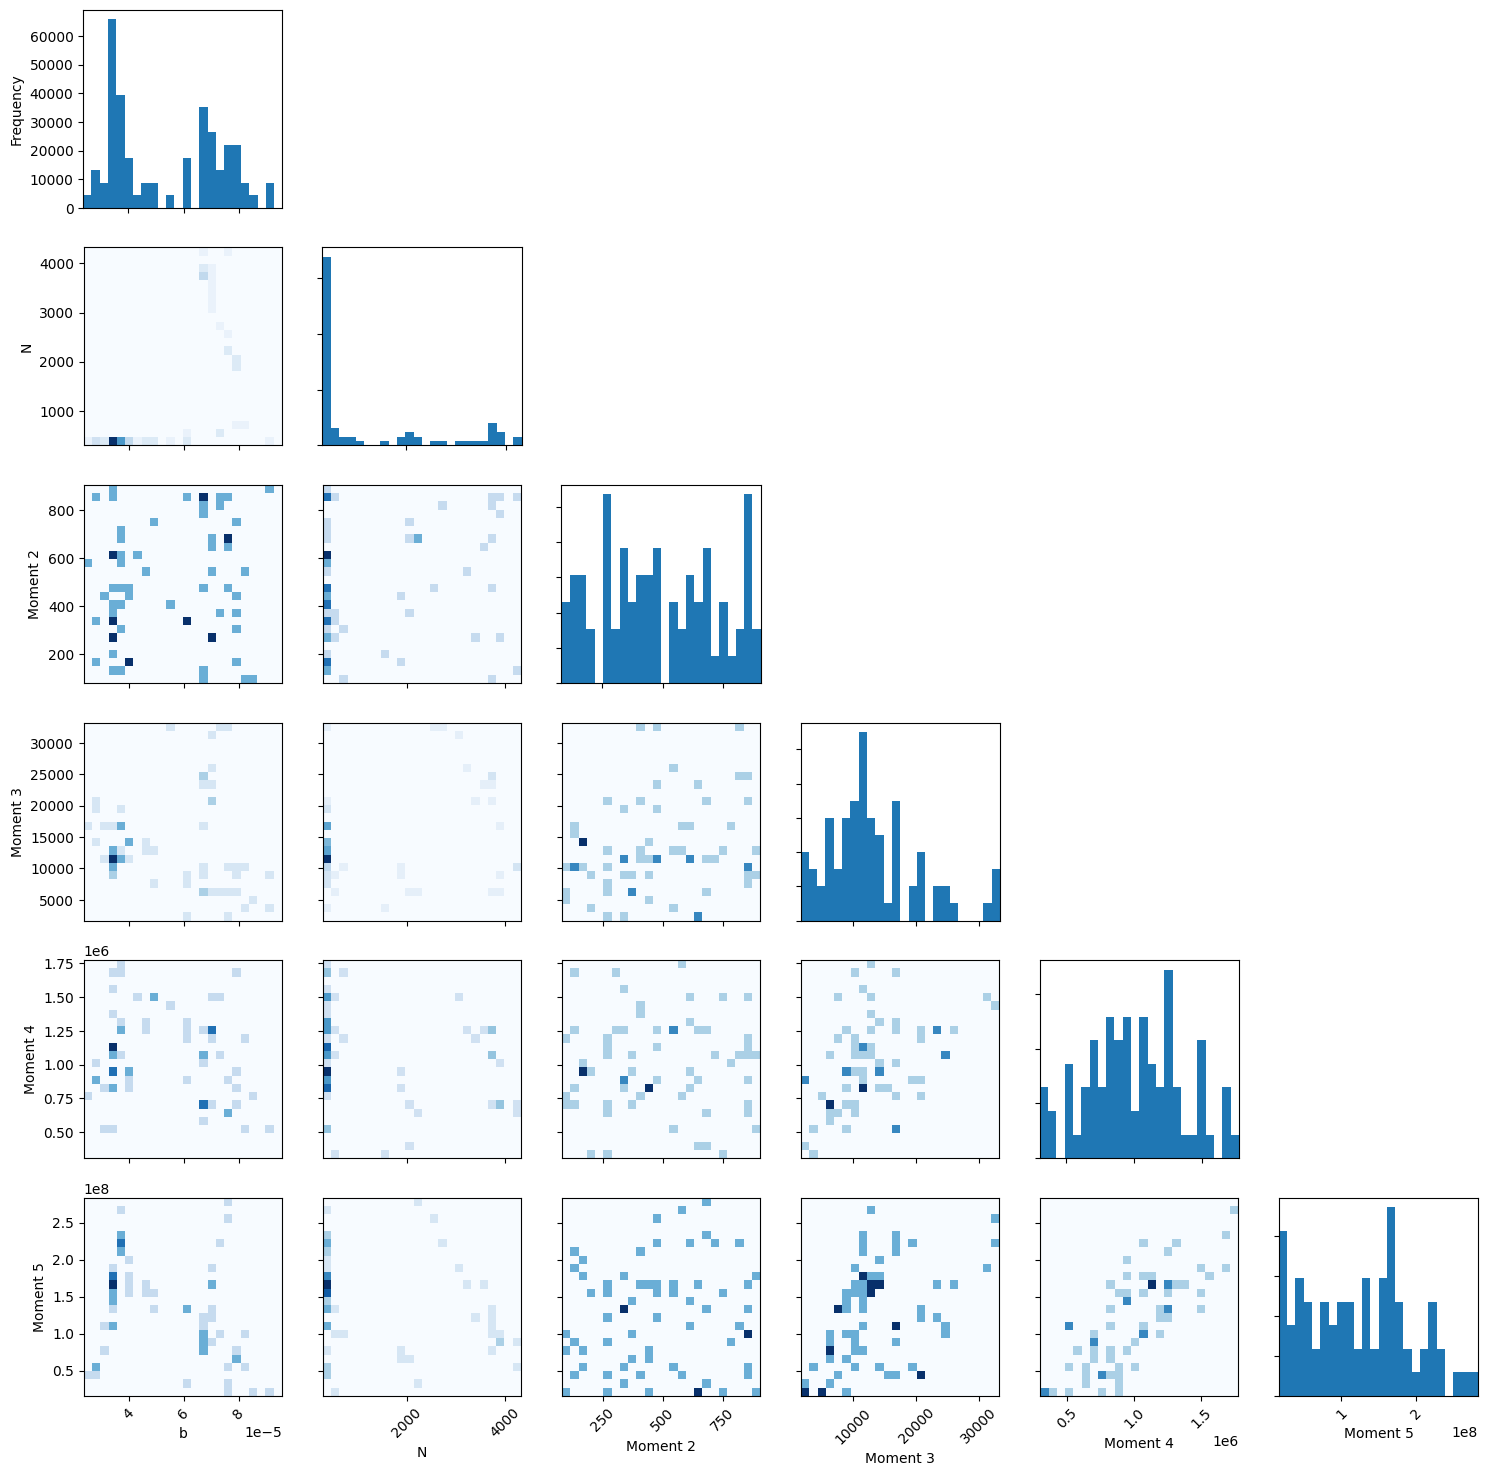

In [28]:
parameter_names = ["b","N", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)
print(AllChains[0])
pints.plot.pairwise(AllChains[:,[0,1,3,4,5,6]], heatmap=True, 
                    parameter_names=["b","N", "Moment 2", "Moment 3", "Moment 4", "Moment 5"],
                    n_percentiles = 85)
plt.show()


In [29]:
parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
results = pints.MCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)


<class 'pints._mcmc._summary.MCMCSummary'>
param     mean          std.         2.5%          25%           50%           75%           97.5%         rhat    ess    ess per sec.
--------  ------------  -----------  ------------  ------------  ------------  ------------  ------------  ------  -----  --------------
b         0.00          0.00         0.00          0.00          0.00          0.00          0.00          1.40    11.14  0.19
N         349.99        5.20         345.45        347.87        348.62        349.50        367.77        1.41    12.42  0.21
Moment 1  0.21          0.90         0.00          0.00          0.00          0.00          2.79          1.16    19.83  0.34
Moment 2  656.86        549.40       112.66        219.97        388.10        1074.82       1880.68       1.38    16.93  0.29
Moment 3  25517.56      12458.28     11232.23      15092.71      21203.88      36496.62      51548.95      2.53    13.60  0.23
Moment 4  2631447.25    533432.58    1820480.04   

In [30]:
from tabulate import tabulate
class MyMCMCSummary(pints.MCMCSummary):
    def __str__(self):
        """
        Prints posterior summaries for all parameters to the console, including
        the parameter name, posterior mean, posterior std deviation, the
        2.5%, 25%, 50%, 75% and 97.5% posterior quantiles, rhat, effective
        sample size (ess) and ess per second of run time.
        """
        if self._summary_str is None:
            headers = [
                'param', 'mean', 'std.',
                '2.5%', '25%', '50%', '75%', '97.5%',
                'rhat', 'ess']
            if self._time is not None:
                headers.append('ess per sec.')

            self._summary_str = tabulate(
                self._summary_list,
                headers=headers,
                numalign='left',
                floatfmt='.3g',
            )

        return self._summary_str
    


In [31]:

parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
results = MyMCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

<class '__main__.MyMCMCSummary'>
param     mean      std.      2.5%      25%       50%       75%       97.5%     rhat    ess    ess per sec.
--------  --------  --------  --------  --------  --------  --------  --------  ------  -----  --------------
b         3.56e-05  1.3e-06   3.46e-05  3.5e-05   3.53e-05  3.55e-05  4.01e-05  1.4     11.1   0.192
N         350       5.2       345       348       349       349       368       1.41    12.4   0.214
Moment 1  0.21      0.905     1.19e-16  9.52e-13  7.2e-10   2.26e-06  2.79      1.16    19.8   0.341
Moment 2  657       549       113       220       388       1.07e+03  1.88e+03  1.38    16.9   0.291
Moment 3  2.55e+04  1.25e+04  1.12e+04  1.51e+04  2.12e+04  3.65e+04  5.15e+04  2.53    13.6   0.234
Moment 4  2.63e+06  5.33e+05  1.82e+06  2.12e+06  2.62e+06  3.13e+06  3.43e+06  1.87    10.2   0.175
Moment 5  3.13e+08  5.36e+07  2.09e+08  2.89e+08  3.17e+08  3.44e+08  4.19e+08  1.62    11.5   0.199
